In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv("C:\\Users\\soura\\Downloads\\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [49]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [50]:
x=df.drop(['target'],axis='columns')
y=df['target']

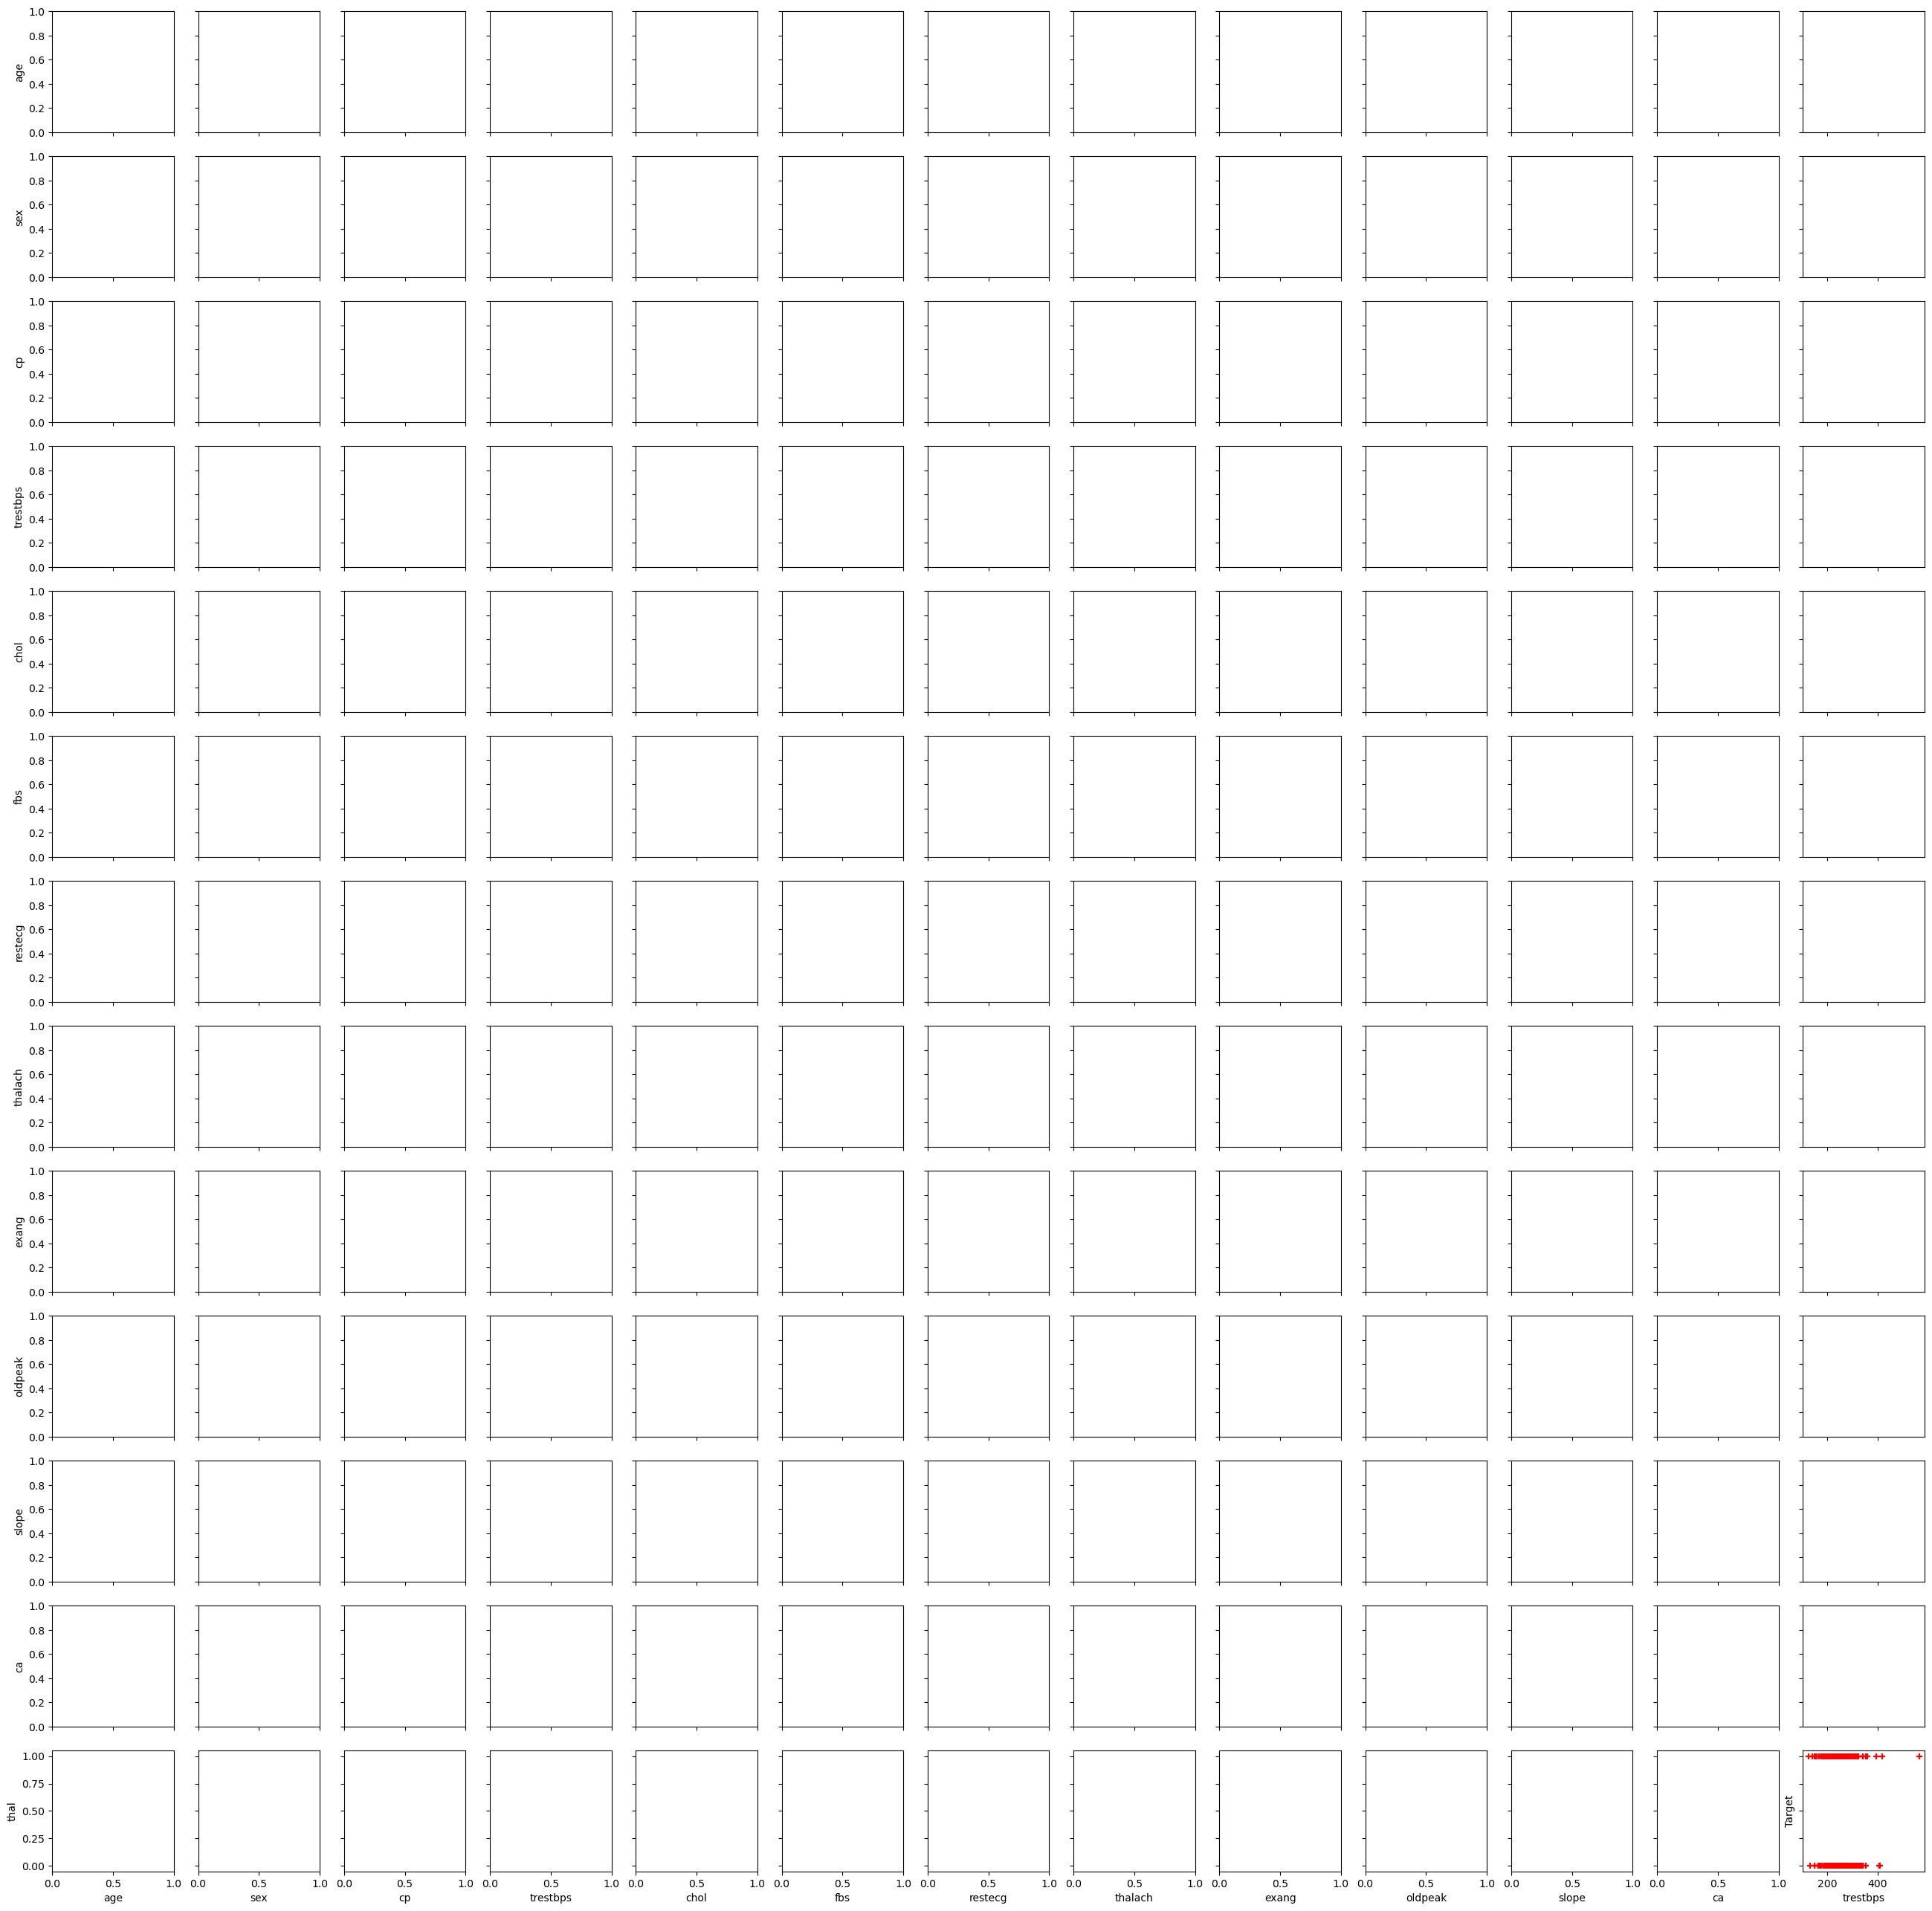

In [53]:
plt.scatter(df['chol'], df['target'], color='red', marker='+')
plt.xlabel('trestbps')
plt.ylabel('Target')
plt.show()


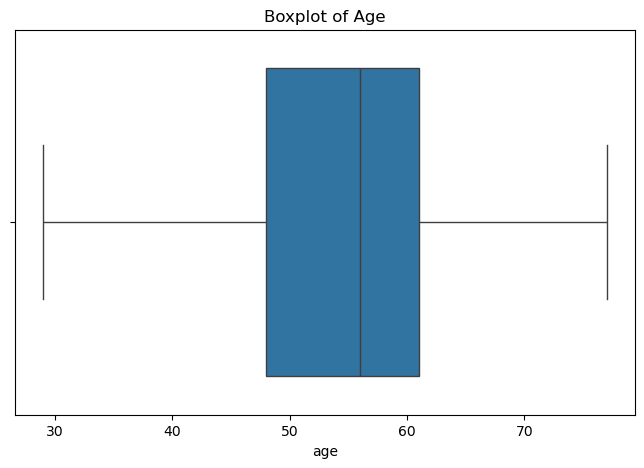

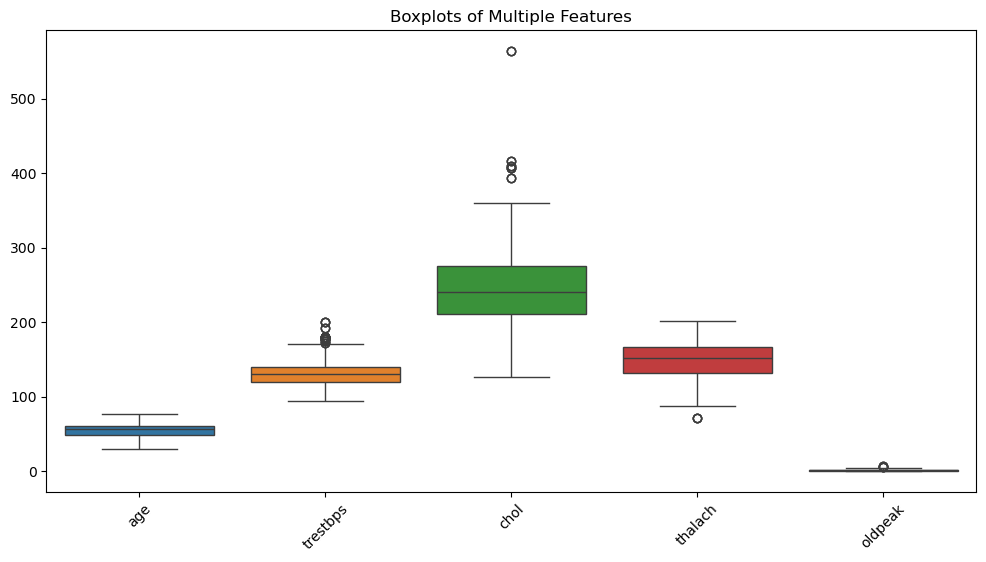

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for one feature
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

# Boxplot for multiple features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.xticks(rotation=45)
plt.title("Boxplots of Multiple Features")
plt.show()


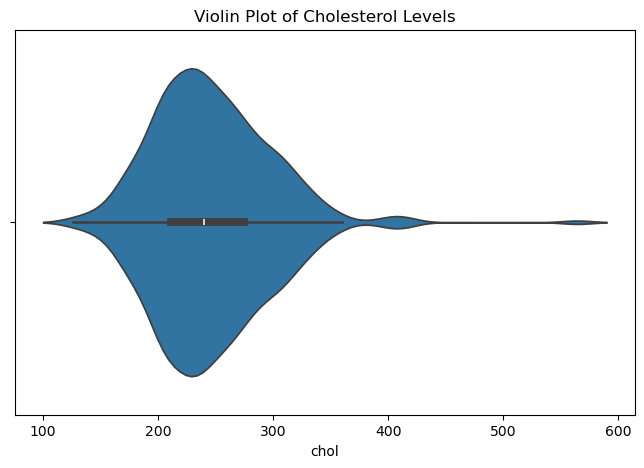

In [55]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['chol'])
plt.title("Violin Plot of Cholesterol Levels")
plt.show()


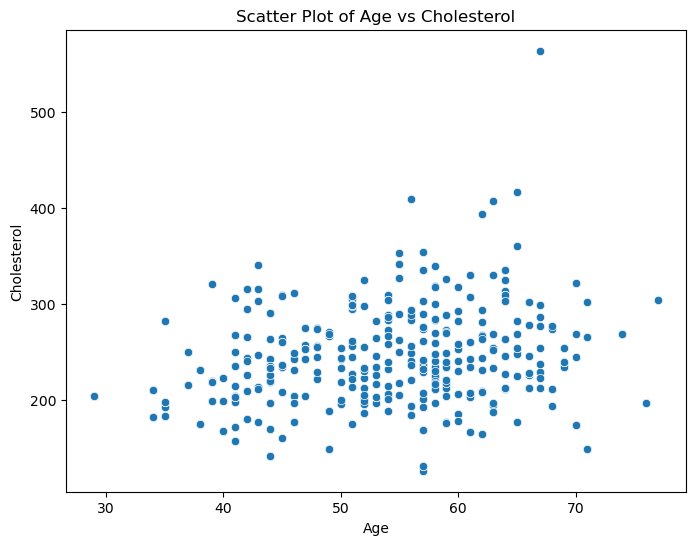

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['chol'])
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Scatter Plot of Age vs Cholesterol")
plt.show()


In [57]:
import pandas as pd

def remove_outliers_iqr(df, columns, threshold=1.5):
    """
    Removes outliers from a DataFrame using the IQR method.

    Parameters:
    - df: Pandas DataFrame
    - columns: List of column names to check for outliers
    - threshold: The IQR multiplier (default=1.5)

    Returns:
    - DataFrame without outliers
    """
    df_clean = df.copy()  # Copy to avoid modifying original data
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Remove rows where the column value is outside the bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# List of columns to clean
columns_to_check = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','slope','ca','thal']

# Apply function
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Print before & after
print(f"Original DataFrame size: {df.shape}")
print(f"Cleaned DataFrame size: {df_cleaned.shape}")


Original DataFrame size: (1025, 14)
Cleaned DataFrame size: (881, 14)


In [58]:
df_cleaned.shape

(881, 14)

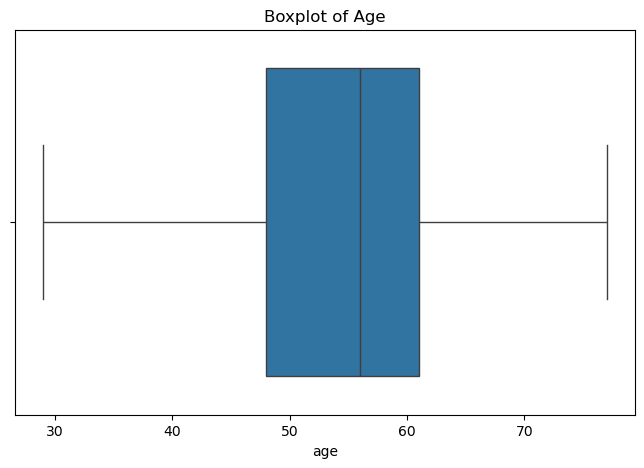

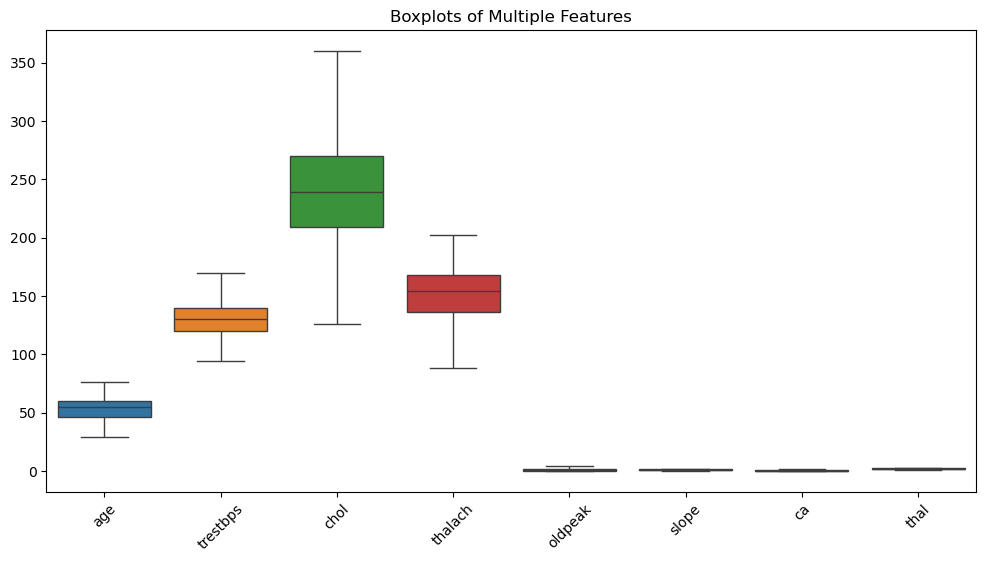

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for one feature
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

# Boxplot for multiple features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','slope','ca','thal']])
plt.xticks(rotation=45)
plt.title("Boxplots of Multiple Features")
plt.show()


In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


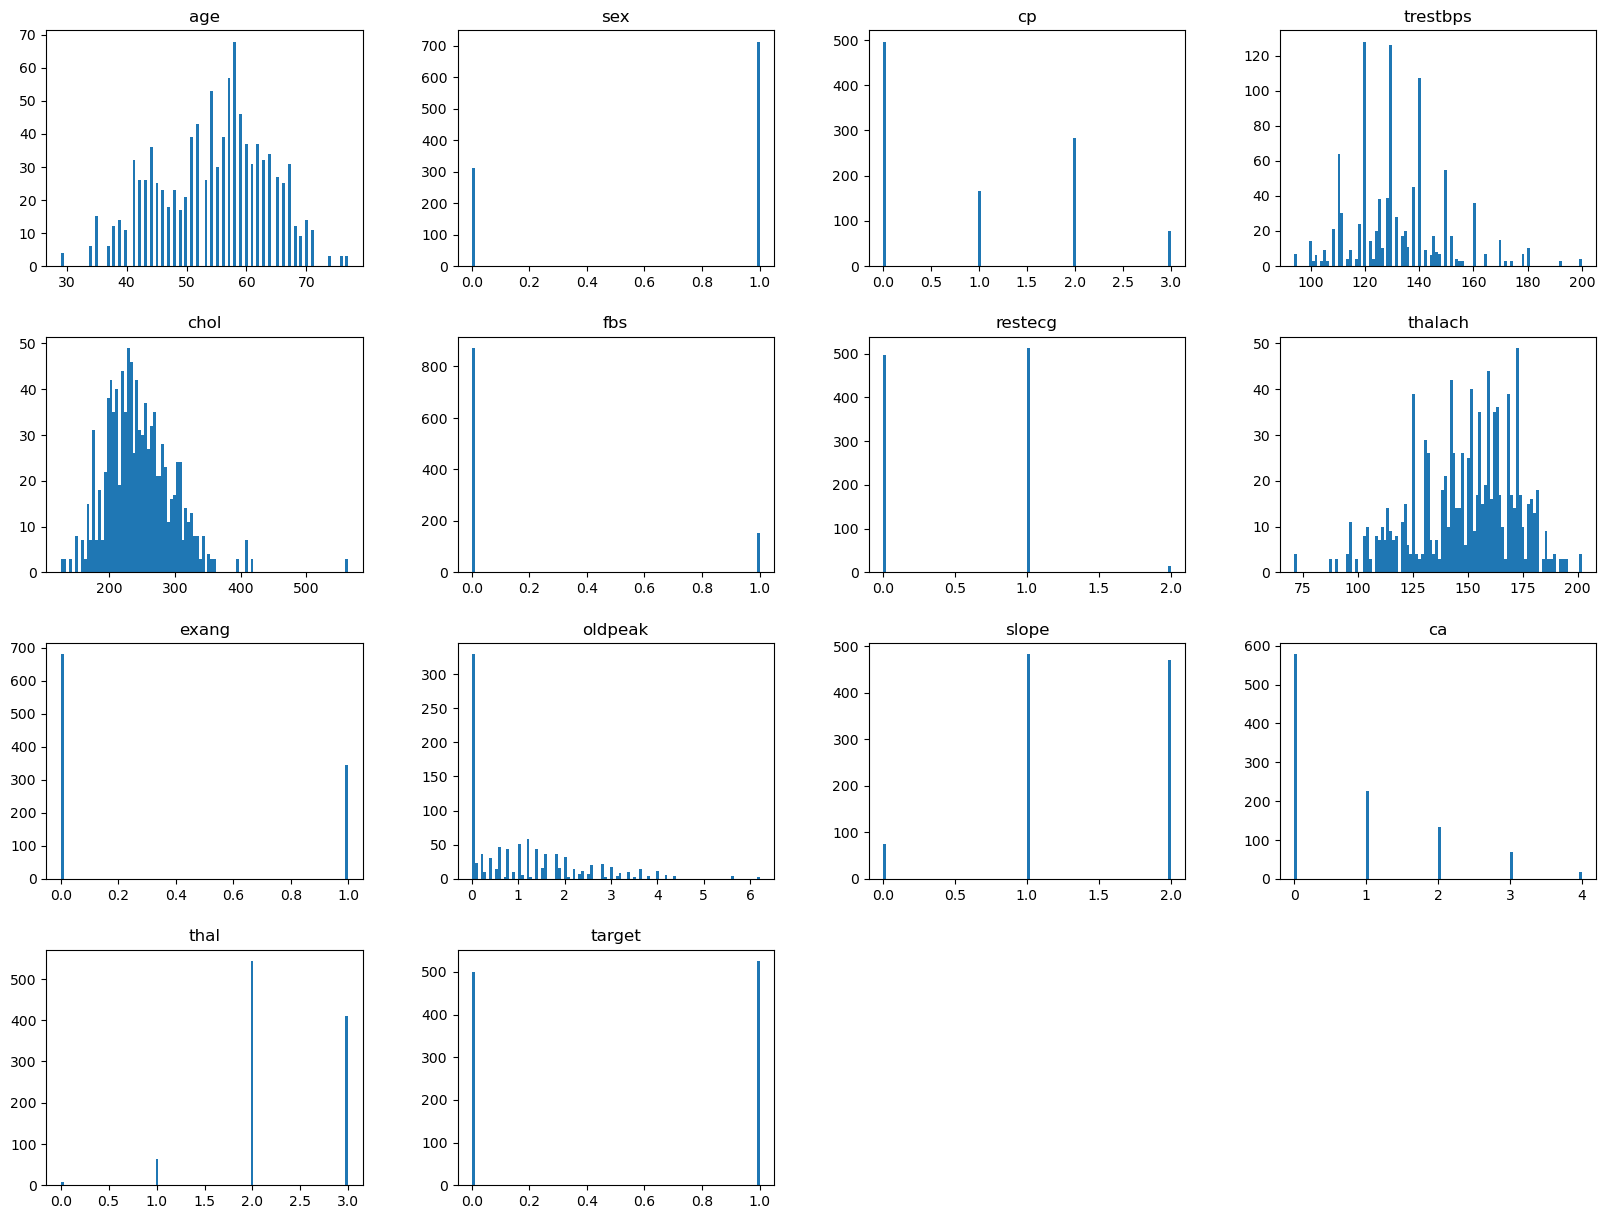

In [61]:
df.hist(bins=100,grid=False,figsize=(20,15))
plt.show()

In [62]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


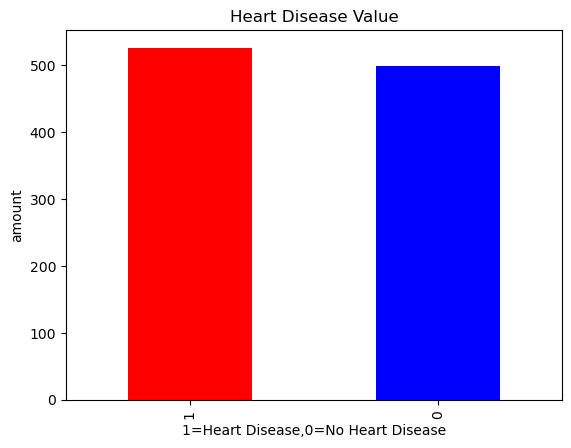

In [66]:
df.target.value_counts().plot(kind='bar',color=["red","blue"])
plt.title("Heart Disease Value")
plt.xlabel("1=Heart Disease,0=No Heart Disease")
plt.ylabel("amount")
plt.show()

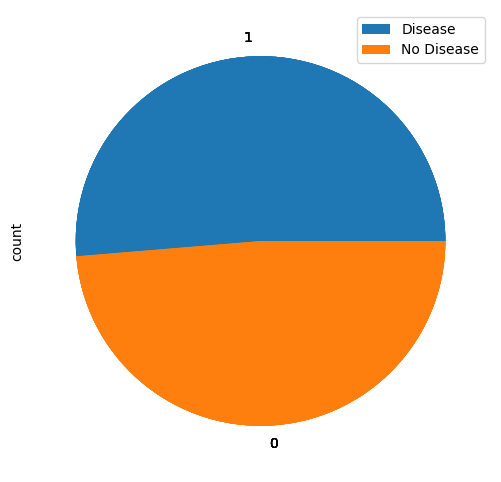

In [71]:
df.target.value_counts().plot(kind='pie',figsize=(8,6))
plt.legend(["Disease","No Disease"])
plt.show()

In [75]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

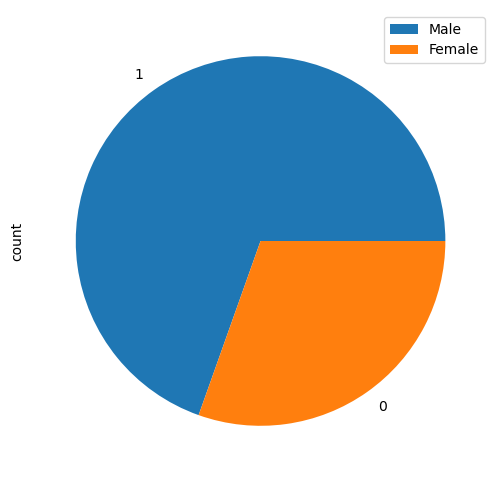

In [77]:
df.sex.value_counts().plot(kind='pie',figsize=(8,6))
plt.legend(["Male","Female"])
plt.show()

In [78]:
#which of the sex has most heart disease
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300
